# Sprint 7 Project

## Initializing Data

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, RandomizedSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
random_state = 54321
np.random.seed(random_state)
random.seed(random_state)

In [3]:
df_user_behavior = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
display(df_user_behavior.head(10))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


## Exploratory Data Analysis

In [4]:
display(df_user_behavior.describe())

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
display(df_user_behavior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

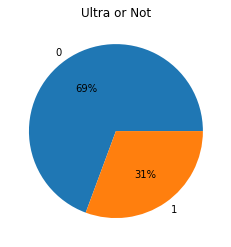

In [6]:
df_user_behavior.groupby('is_ultra').count().plot(
                     kind='pie',
                     y='mb_used',
                     autopct='%1.0f%%',
                     legend=False)
plt.title('Ultra or Not')
plt.ylabel('')
plt.show()

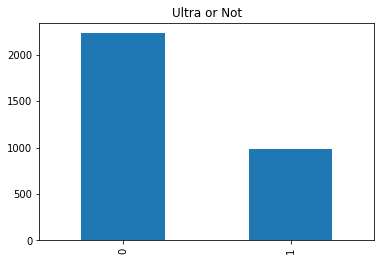

In [7]:
df_user_behavior.groupby('is_ultra').count().plot(
                     kind='bar',
                     y='mb_used',
                     legend=False)
plt.title('Ultra or Not')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [8]:
df_user_behavior["is_ultra"].value_counts()/len(df_user_behavior)*100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

In [9]:
target = "is_ultra"
features = ["calls", "minutes", "messages", "mb_used"]

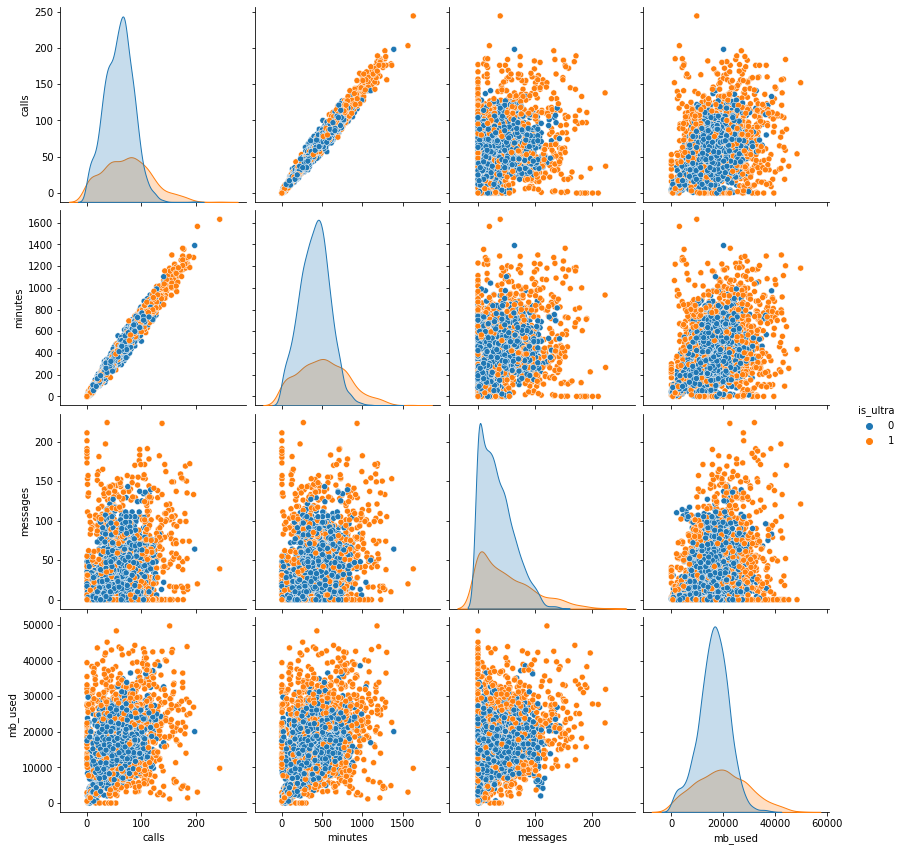

In [10]:
sns.pairplot(df_user_behavior, hue=target, height=3)

## Splitting Data

In [11]:
df_user_behavior_train, df_user_behavior_valid = df_user_behavior[features],df_user_behavior[target]

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
df_user_behavior_train,
df_user_behavior_valid,
test_size=0.2, 
random_state=random_state,
stratify=df_user_behavior_valid)

In [13]:
display(features_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 2755 to 2926
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2571 non-null   float64
 1   minutes   2571 non-null   float64
 2   messages  2571 non-null   float64
 3   mb_used   2571 non-null   float64
dtypes: float64(4)
memory usage: 100.4 KB


None

In [14]:
display(features_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2051 to 2906
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB


None

In [15]:
display(target_train)

2755    0
1350    1
454     0
1005    0
82      0
       ..
165     0
440     0
714     0
1806    0
2926    1
Name: is_ultra, Length: 2571, dtype: int64

In [16]:
display(target_test)

2051    0
2578    0
960     1
160     0
1135    1
       ..
1671    1
43      1
1059    0
162     1
2906    0
Name: is_ultra, Length: 643, dtype: int64

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(
features_train,
target_train,
test_size=0.25, 
random_state=random_state)

In [18]:
display(features_train.shape)

(1928, 4)

In [19]:
display(features_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2304 to 3107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
dtypes: float64(4)
memory usage: 75.3 KB


None

In [20]:
display(target_train.shape)

(1928,)

In [21]:
display(target_train)

2304    1
3212    0
2046    1
1855    0
1634    1
       ..
3011    0
18      0
2902    0
88      0
3107    1
Name: is_ultra, Length: 1928, dtype: int64

In [22]:
display(features_valid.shape)

(643, 4)

In [23]:
display(features_valid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 665 to 3120
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB


None

In [24]:
display(target_valid.shape)

(643,)

In [25]:
display(target_valid)

665     0
1100    0
871     1
770     1
3156    0
       ..
3198    1
1339    0
807     0
541     1
3120    0
Name: is_ultra, Length: 643, dtype: int64

## Testing Models

### Decision Tree Classifier

#### Training

In [26]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(features_train, target_train)

DecisionTreeClassifier()

In [27]:
display('First training score for Decision Tree Classifier:')
display(decision_tree_model.score(features_train, target_train))

1.0

#### Testing

In [28]:
dt_target_pred = decision_tree_model.predict(features_test)
dt_target_valid = decision_tree_model.predict(features_valid)

In [29]:
display('First test score for Decision Tree Classifier:')
display(accuracy_score(target_test,dt_target_pred))

0.7356143079315708

#### Tuning Hyperparameters

In [30]:
parameters = {
"random_state":[54321],
"max_depth":[*range(1,11,1)],
"min_samples_split":[*range(1,11,1)],
"min_samples_leaf":[*range(1,11,1)]}

In [31]:
import warnings
warnings.filterwarnings("ignore")
decision_tree_model_tuned = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5).fit(features_train, target_train)

In [32]:
dt_tuned_target_pred = decision_tree_model_tuned.predict(features_test)

In [33]:
display(decision_tree_model_tuned.score(features_train, target_train))

0.8366182572614108

In [34]:
display(accuracy_score(target_test, dt_tuned_target_pred))

0.7978227060653188

#### Validation

In [35]:
best_model = DecisionTreeClassifier(**decision_tree_model_tuned.best_params_).fit(features_train, target_train)

In [36]:
best_model_valid = best_model.predict(features_valid)

In [37]:
display(best_model)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, random_state=54321)

In [38]:
display('Best model training score:')
display(best_model.score(features_train, target_train))

'Best model training score:'

0.8366182572614108

In [39]:
display('Best model validation score:')
display(accuracy_score(target_valid, best_model_valid))

'Best model validation score:'

0.8040435458786936

<div class="alert alert-warning">
<b>Reviewer's comment</b>

It would be really nice to clarify in the printed line what metric you're using and whether it is a train set or validation set score

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Here it would be again nice to clarify which scores these are

</div>

### Random Forest Model

#### Training

In [40]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(features_train, target_train)

RandomForestClassifier()

In [41]:
display('First training score for Random Forest Classifier:')
display(random_forest_model.score(features_train, target_train))

1.0

#### Testing

In [42]:
dt_forest_target_pred = random_forest_model.predict(features_valid)

In [43]:
display('First valid score for Decision Tree Classifier:')
display(accuracy_score(target_valid,dt_forest_target_pred))

0.8055987558320373

#### Tuning Hyperparameters

In [44]:
parameters = {
"random_state":[54321],
"n_estimators":[*range(1,51,1)],
"max_depth":[*range(1,51,1)]}

In [45]:
random_forest_model_tuned = GridSearchCV(RandomForestClassifier(), parameters, cv=5).fit(features_train, target_train)

In [46]:
dt_tuned_forest_target_pred = random_forest_model_tuned.predict(features_valid)

In [49]:
display('Tuned up Random Forest Classifier Score')
display(random_forest_model_tuned.score(features_train, target_train))

'Tuned up Random Forest Classifier Score'

0.8661825726141079

In [50]:
display(accuracy_score(target_valid, dt_tuned_forest_target_pred))

0.8180404354587869

#### Final Test

In [53]:
best_forest_model = RandomForestClassifier(**random_forest_model_tuned.best_params_).fit(features_train, target_train)

In [54]:
best_forest_model_valid = best_forest_model.predict(features_test)

In [55]:
display(best_forest_model)

RandomForestClassifier(max_depth=8, n_estimators=49, random_state=54321)

In [57]:
display('Best model training score:')
display(best_forest_model.score(features_train, target_train))

'Best model training score:'

0.8661825726141079

In [58]:
display('Best model testing score:')
display(accuracy_score(target_valid, best_forest_model_valid))

'Best model testing score:'

0.6065318818040435

### Logistics Regression

#### Training

In [59]:
logistics_model =  LogisticRegression()
logistics_model.fit(features_train,target_train)
score_train = logistics_model.score(features_train,target_train) 

In [60]:
display("Score of the logistic regression model on the training set:",score_train)

'Score of the logistic regression model on the training set:'

0.7126556016597511

#### Testing

In [61]:
logistics_prediction = logistics_model.predict(features_test) 
score_test = accuracy_score(target_test,logistics_prediction) 

In [62]:
display("Accuracy of the logistic regression model on the test set:",score_test)

'Accuracy of the logistic regression model on the test set:'

0.7076205287713841

In [63]:
logistics_model_test =  LogisticRegression()
logistics_model_test.fit(features_train,target_train)
logistics_valid = logistics_model.predict(features_valid)
score_valid = accuracy_score(target_valid, logistics_valid)  
score_test_valid = logistics_model_test.score(features_valid,target_valid)  

In [64]:
display("Accuracy of the logistic regression model on the validation set:",score_valid)

'Accuracy of the logistic regression model on the validation set:'

0.6905132192846034

In [65]:
display("Score of the logistic regression model on the validation set:",score_test_valid)

'Score of the logistic regression model on the validation set:'

0.6905132192846034

#### Tuning Hyperparameters

In [66]:
logistics_tuned = LogisticRegression(verbose=0, random_state=random_state).fit(features_train, target_train)
valid_pred = logistics_tuned.predict(features_valid)

In [67]:
display('Accuracy score for the final valid set.')
display(accuracy_score(target_valid,valid_pred))

0.6905132192846034

### Sanity Check

#### Never Ultra

In [68]:
dummy_model = DummyClassifier(strategy='stratified').fit(features_train, target_train)
dummy_preds = dummy_model.predict(features_test)
display(f"Mean accuracy on test set: {dummy_model.score(features_test, target_test):.2f}")

'Mean accuracy on test set: 0.58'

Random guessing gives accuracy close to 60%. Lower than all other ML models tested. However, the Random Forest Model did not score so well on its final test. It only score a 60%, and since about 70% of all the plans are not ultra, a model that just assumed Not Ultra would score higher than the random forest model. Likewise, the Logistics Regression only scored 69% on its test which is the same accuracy as assuming all plans are not ultra. Neither of those models were very effective. The Decision Tree Classifier on the other hand scored over 8